<a href="https://colab.research.google.com/github/christitensor/FIN-6470/blob/master/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. In class we stated that the equilibrium price of a forward contract should behave according to the formula F0 = S0erT. Demonstrate that this is true using the arbitrage principle. Assume that you are dealing with an investment asset that pays no dividends unless stated otherwise. Specifically, answer the following:

####(a) Suppose F0 > S0erT . Does this imply an arbitrage opportunity? Explain.

This does imply an arbitrage opportunity since F0 does not equal S0erT. The market is in contango, so the arbitrage opportunity arises for the the investor who takes a short position, with the assumption that the economy is always trending toward equilibirium. This would lead us to beleave that the futures price would move downward until it met the spot price. 

####(b) Now suppose F0 < S0erT . Does this imply an arbitrage opportunity? Explain.


This does imply an arbitrage opportunity since F0 does not equal S0erT. The market is in backwardation. In this situation, the investor would want to take the opposite strategy of the investor in part a. They will now want to take a long postion, with the assumpiton that the futures price must increase until it meets the spot price.

####(c) Now assume that you are dealing with either a dividend-paying asset in the form of discrete dollar dividend payments, or a continuous dividend yield. How does this change the pricing equation? Explain.

If we have to now take into account dividends, the equation for a forward contract becomes F =(S-D)*e^(r*t). The investor now needs to take into account the present value of the sum of all the dividend payments.

####(d) Now assume that you are dealing with a consumption commodity with storage costs, and that holding the physical commodity has certain benefits (i.e. a convenience yield). How does this change the pricing equation? Explain.

Dealing with a consumption comodity, the equation then becomes F = Se^((r+s-c)*t)


In [0]:
import numpy as np
S = 10
e = np.exp
r = .05
t = 10
def convenienceYield(s,c):
  F = S*e((r+(s/S)+c)*t)
  print("Storage Cost =", (s/S), "Convenience Yield=", c,"Forward Price=", F)

convenienceYield(2,.0025)
convenienceYield(5,.0025)
convenienceYield(2, .005)
convenienceYield(5, .005)

Storage Cost = 0.2 Convenience Yield= 0.0025 Forward Price= 124.90895263606808
Storage Cost = 0.5 Convenience Yield= 0.0025 Forward Price= 2508.863380208446
Storage Cost = 0.2 Convenience Yield= 0.005 Forward Price= 128.0710378266303
Storage Cost = 0.5 Convenience Yield= 0.005 Forward Price= 2572.37555905775


As you can see, if you increase either the storage cost or convenice yield, the forward price will increase as well.

####(e) In class we argued that all of this depends upon the possibility of physical delivery of the contract, which guarantees that FT = ST , that is that the futures price at maturity is equal to the spot price at maturity. First, explain why that is. Second, what would happen if FT ̸= ST ? Carefully explain.

This is due to suppy and demand. While the contract has been getting closer to delivery, a drop in the futures price is cause by traders shorting futures.

####(f) Consider a new kind of forward contract called a prepaid forward. It is very similar to a standard forward contract. The only difference is that the long party pays the short party at time t = 0, but still takes delivery from the short party at t = T . How must the standard pricing formula be modified to properly price the prepaid forward? Carefully explain your logic. Why would anyone ever want to transact in such a contract? Do we actually see prepaid forward contracts in the real world, or only in finance textbooks?

The formula then becomes F = S-(Promised Income Receipts). We get to this because you are essentially paying for the stock, but you do not own it. Since you don’t own it, you miss out on dividend payments, so we subtract those out. One may want to enter into a prepaid forward if they want profit while also deferring taxes on that profit, since they do not actually own the stock.

##2. In the Midterm folder on Canvas there is a subfolder titled Data. In it you will find historical nearby daily settlement futures prices as well as daily New York Harbor spot prices for WTI Crude Oil for the period 01/01/1992 to 12/31/1993. Using these data answer the following questions:


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
rawData = pd.read_csv('https://raw.githubusercontent.com/christitensor/FIN-6470/master/WTI-Prices-1992-to-1993.csv', index_col = 0, parse_dates = True)
rawData.head()

,Spot,Futures
Date,,
1992-01-02,19.43,19.49
1992-01-03,19.22,19.23
1992-01-06,19.24,19.21
1992-01-07,18.72,18.69
1992-01-08,17.95,17.87


####(a) Test the series for unit roots using the Augmented Dickey-Fuller test. Conduct the tests for prices in levels, and first price differences. Also conduct the test in log-price levels and log-price first differences. What do you conclude? Do any of the series contain a unit root? Which ones? Are the results what you expected, or did they surprise you?

In [0]:
import statsmodels.api as sm

def unitroottest(s):
  y = np.cumsum(s)
  results = sm.tsa.stattools.adfuller(y)
  print(f"The value of the ADf statistic is {results[0]:0.4f}, with a p-value of: {results[1]: 0.4}")
  if results[1]> results[4]['10%']:
    print("Fail to reject that there is a unit root for y")
  else: 
    print("Reject that there is a unit for y")
def difference(dataset, interval = 1):
  diff = list()
  for i in range(interval,len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return(pd.Series(diff))


In [0]:
print("Price in levels:")
unitroottest(rawData.Spot)

Price in levels:
The value of the ADf statistic is -2.2808, with a p-value of:  0.1782
Fail to reject that there is a unit root for y


In [0]:
print("First Price Differences:")
x = difference(rawData.Spot)
unitroottest(x)

First Price Differences:
The value of the ADf statistic is -0.2820, with a p-value of:  0.928
Fail to reject that there is a unit root for y


In [0]:
print("Log-price Levels")
unitroottest(np.log(rawData.Spot))

Log-price Levels
The value of the ADf statistic is -2.2542, with a p-value of:  0.1872
Fail to reject that there is a unit root for y


In [0]:
print("Log-price first differences")
z = difference(np.log(rawData.Spot))
unitroottest(x)

Log-price first differences
The value of the ADf statistic is -0.2820, with a p-value of:  0.928
Fail to reject that there is a unit root for y


All of the above contain a unit root. since one contains a unit root, I am not surprised they all contain a unit root. This leads me to believe we are dealing with a random walk.

####(b) Make time series plots of the series in price levels, first differences, log-price levels, and log-price first differences.


Text(0.5, 1.0, 'Price Levels')

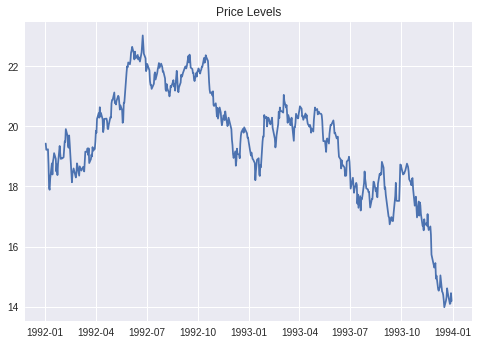

In [0]:
plt.plot(rawData.Spot)
plt.title("Price Levels")

Text(0.5, 1.0, 'First Difference')

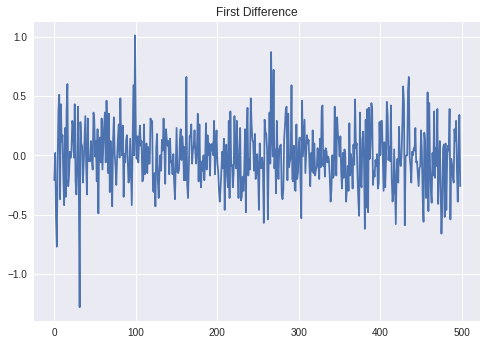

In [0]:
plt.plot(x)
plt.title('First Difference')

Text(0.5, 1.0, 'Log-Price Levels')

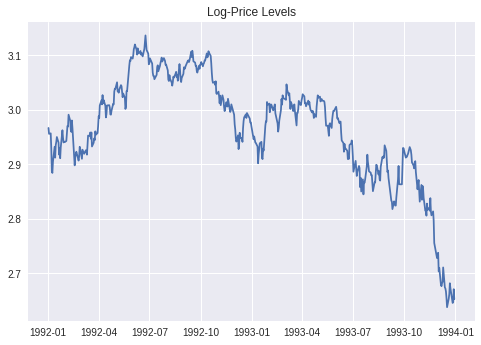

In [0]:
plt.plot(np.log(rawData.Spot))
plt.title('Log-Price Levels')

Text(0.5, 1.0, 'Log-Price First Difference')

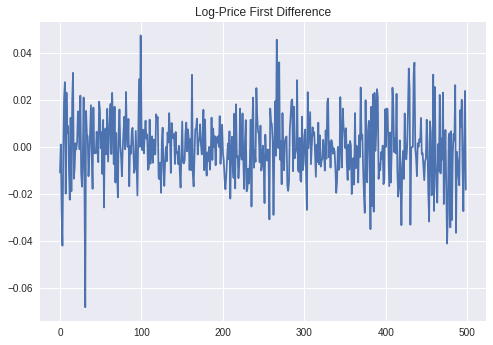

In [0]:
plt.plot(z)
plt.title('Log-Price First Difference')

####(c) Carry out the Engle-Granger two-step procedure to test for cointegration between the series? What are the results? Are the series cointegrated? If so, what is the cointegrating vector? Carefully ex- plain.

In [0]:
from scipy import stats
y = rawData.Spot
x = rawData.Futures
reg = stats.linregress(x, y)
uhat = y - reg.intercept - reg.slope * x
resids = pd.Series(uhat)

In [0]:
results = sm.tsa.stattools.adfuller(uhat)
print(f"The ADF statistic is: {results[0]:0.4f}, with p-value of: {results[1]: 0.4}")

The ADF statistic is: -11.9933, with p-value of:  3.481e-22


We reject the null hypothesis of a unit root. This leads us to conculde that the two series are cointegrated. 

####(d) Make a plot of the estimated residuals and comment on the graph as relates to the issue of of cointegration.

Text(0.5, 1.0, 'Residuals')

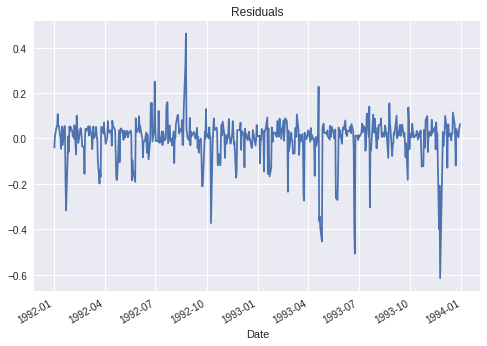

In [0]:
resids.plot(grid = True)
plt.title('Residuals')

The Residuals appear to be mean reverting.

####(e) Using linear regression calculate a rolling minimum-variance hedge ratio for each day of 1993 based on 60 prior days observations. Plot a time-series of the hedge-ratios. Comment on the nature of the plotted series. What does this say about the dynamic stability of the hedge ratio?

In [0]:
reg


LinregressResult(slope=1.0044466275280897, intercept=-0.10653268500179891, rvalue=0.9986514549084081, pvalue=0.0, stderr=0.0023399119902215897)

In [0]:
N =500
x = np.cumsum(y)
a = reg.intercept
b = reg.slope
z = reg.stderr

y = a + b * x + z
dS = np.diff(y)
dF = np.diff(x)

In [0]:
dS.shape

(499,)

In [0]:
dF.shape

(499,)

In [0]:
M = 60
L = N - M
h = np.empty(L)
ibeg = 0 
iend = 60

for i in range(L):
  reg = stats.linregress(dF[ibeg:iend], dS[ibeg:iend])
  h[i] = reg.slope
  ibeg += 1
  iend += 1

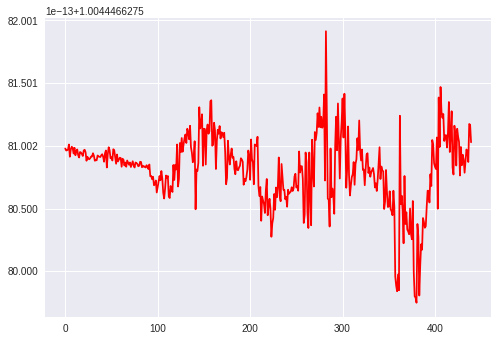

In [0]:
ts = pd.Series(h)
ts.plot(grid = True, color = 'r')

The series appears to be relatively stable in the beginning, shifting to be not so later on.

##3. In this problem you will simulate values for spot prices and basis for heating oil and gasoline following the models of Bollen and Whaley in their paper Simulating Supply (which is in the readings file). Specifically, the follow models will be used: With this as background, do the following

###(a) Simulate 45 days of prices for spot and daily settlement prices for futures (via the basis equation). Looking at figure 1 in the paper use initial values of $0.69 for heating oil and $0.80 for gasoline. Use an initial value for heating oil basis of −0.02 and −0.01 for gasoline. See Table 2 in the paper for the other parameter values.


In [0]:
s1 = 0.11
s2 = 0.116
rho = 0.705
numReps = 10000

z1 = np.random.normal(size=numReps) * s1
ztmp = np.random.normal(size=numReps)
z2 = z1 * rho + np.sqrt((1 - rho**2)) * ztmp * s2

def drawCorrelatedNormals(mn1 = 0.0, sd1 = 1.0, mn2 = 0.0, sd2 = 1.0, rho = 0.705, numReps = 100):
    z1 = np.random.normal(size=numReps, loc=mn1, scale=sd1)
    z2 = np.random.normal(size=numReps, loc=mn2, scale=sd2)
    z2 = rho * z1 + np.sqrt((1.0 - rho**2.0)) * z2
    
    return (z1,z2)

a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
a2 = 0.391
b2 = 0.560
s2 = 0.116
S2 = 0.80
numReps = 45

lnSpot1 = np.zeros(numReps)
lnSpot2 = np.zeros(numReps)

lnSpot1[0] = np.log(S1)
lnSpot2[0] = np.log(S2)


z1, z2 = drawCorrelatedNormals(sd1=s1, sd2=s2, rho=rho, numReps=numReps)

for t in range(1, numReps):
    lnSpot1[t] = lnSpot1[t-1] + a1 * (b1 - np.exp(lnSpot1[t-1])) + z1[t]
    lnSpot2[t] = lnSpot2[t-1] + a2 * (b2 - np.exp(lnSpot2[t-1])) + z2[t] 

ts = pd.DataFrame({'Z1' : lnSpot1, 'Z2' : lnSpot2})


In [0]:
e = 0
basis1 = np.zeros(numReps)
basis2 = np.zeros(numReps)

basis1[0] = np.log(abs(-0.2))
basis2[0] = np.log(abs(-0.01))

for t in range(1,numReps):
  basis1[t] = a1 * -0.02 + (b1 * lnSpot1[t-1]) + e
  basis2[t] = a2 * -0.01 + (b2 * lnSpot2[t-1])+e

bs = pd.DataFrame({"Basis1" : basis1, "Basis2" : basis2})

In [0]:
futures1 = np.zeros(numReps)
futures2 = np.zeros(numReps)


#simulated futures price 
for t in range(1, numReps):
  futures1[t] = lnSpot1[t] * np.exp(basis1[0])
  futures2[t] = lnSpot2[t] * np.exp(basis2[0])
fs = pd.DataFrame({"Futures1" : futures1, "Futures2" : futures2})

###(b) Make time series plots labeling the x-axis as date and the y-axis as dollar prices. Assume a starting date of November 15, 1991. Plot spot prices, basis, and futures prices separately but combining the graphs for heating oil and gasoline together for each. Clearly label the series in each graph.

Text(0, 0.5, 'Dollar Prices')

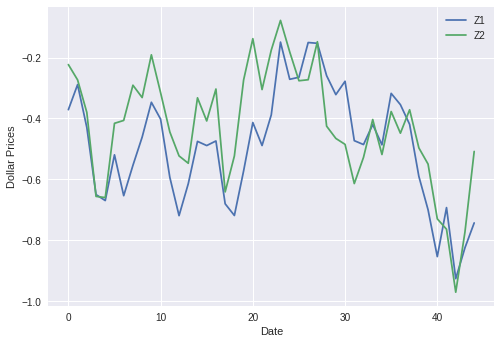

In [0]:
ts.plot(grid = True)
plt.xlabel('Date')
plt.ylabel('Dollar Prices')

Text(0, 0.5, 'Dollar Prices')

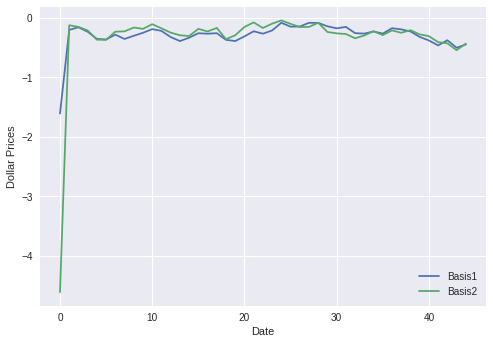

In [0]:
bs.plot(grid = True)
plt.xlabel('Date')
plt.ylabel('Dollar Prices')

Text(0, 0.5, 'Dollar Prices')

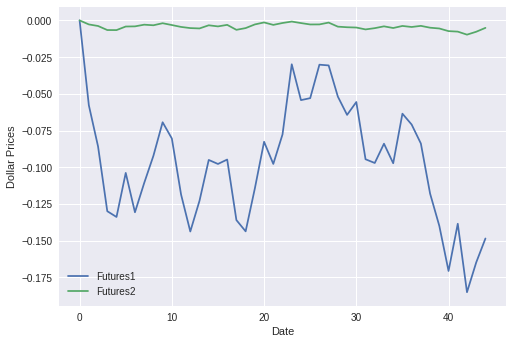

In [0]:
fs.plot(grid = True)
plt.xlabel('Date')
plt.ylabel('Dollar Prices')

###(c) For the simulated 45-day period calculate the market-to-market cash flows. Assume and initial margin of 10% and variation margin of 85% of the initial margin. Assume a position of 1 contract for each position.


In [0]:
ts.head()
ts['MTM'] = ts.Z1 - ts.Z2
ts.MTM.sum()

-2.9624589379256947

###(d) For the simulated 45-day period calculate a minimum-variance hedge ratio for both heating oil and unleaded gasoline.


In [0]:
h1 = rho * (ts.Z1.std()/fs.Futures1.std())
print("Oil minimum-variance hedge ratio ", h1)

h2 = rho * (ts.Z2.std()/fs.Futures2.std())
print("Unleaded Gasoline minimum-variance hedge ratio ",h2)

Oil minimum-variance hedge ratio  3.299954842421295
Unleaded Gasoline minimum-variance hedge ratio  67.58142549978066


###(e) Do the simulated pairs of futures and spot prices appear to be cointe- grated? Why or why not? What does the Bollen-Whaley model used for simulation suggest about cointegration?


In [0]:
y = ts.Z1
x = fs.Futures1
reg = stats.linregress(x, y)
uhat = y - reg.intercept - reg.slope * x
resids = pd.Series(uhat)
results = sm.tsa.stattools.adfuller(uhat)
print(results[1])
print(f"The ADF test statistic is: {results[0]: 0.4f}, with a p-value of: {results[1] : 0.4}")

6.630721252276212e-30
The ADF test statistic is: -17.1827, with a p-value of:  6.631e-30


In [0]:
y = ts.Z2
x = fs.Futures2
reg = stats.linregress(x,y)
uhat = y - reg.intercept - reg.slope * x
resids = pd.Series(uhat)
results = sm.tsa.stattools.adfuller(uhat)
print(f"The ADF test statistic is: {results[0]: 0.4f}, with a p-value of: {results[1]: 0.4}")

The ADF test statistic is: -19.4028, with a p-value of:  0.0


With two p-values that small, we are going to conculde that the two are cointegrated.

##4. Describe the institutional differences between forward markets and futures markets. Describe the historical evolution of futures markets and the institutional features that define futures markets. Why have they developed the way they have? What market problems have they solved?

####The institutional difference between futures and forwards are that forwards are traded over the counter and futures are traded over an exchange. This results in futures being highly standardized. With forward contracts not being traded via an exchange, they can be privately negotiated. This leaves more room for opportunity. The futures market has the clearing house in place which reduces counter party risk. The regulation is tighter, however. The forwards makret allows fro more creativity, but the default risk is higher.

## 5. Consider the paper that was presented in class by Liu titled Price Relations Among Hog, Corn, and Soybean Meal Futures.

###(a) What were the main empirical findings of the paper? What statistical and econometric methods were used by the author? Were you persuaded by author’s evidence?

If markets are inefficent and three series are cointegrated with a single vector, an arbitrage opportuniy exists. Liu used the autoregressive multivariate cointegration model, along with the perron unit root test. I am persuaded by the model and going to look into the helping my father-in-law doing something similar in the mink market.

###(b) At the beginning of the course we read the appendix on the history of thought on equilibrium concepts in economics from Culp’s book Risk Transfer, in which the author states “it becomes quite hard to explain a lot of financial and derivatives market activity without being a little bit Austrian.” How does that idea apply to the empirical findings of Liu? Do you think that statement is true? Can you give Liu’s econometric model (the error-correction model) a neo-Austrian interpretation?

If we are assuming the markets are in equilibrium, there should be no arbitrage opportunities and this whole paper is pointless. If we to were instead take the stance of we are not in equilibrium, just trending towards it, we can then there are arbitrage opportunies and the whole strategy is valid.

###(c) At the end of the paper Liu conducts some trading simulations. Out- line the methodology that Liu uses to conduct these trading simula- tions. Why is that necessary? Do you find the simulations convincing? Would you place real money on his trading model? If not, what would it take to convince you that the model really is predictive of abnormal profits?

Liu runs several versions. He runs one based on reversion to long-run equilibrium. He then does one based on reversion to the estimated mean. If these were a random walk, it would not be safe to do the analysis on these commoditites.

##6. In class we discussed the case of oil hedging by Metalgesellschaft (MG). In their paper Metalgesellschaft and the Economics of Synthetic Storage Culp and Miller defended MG’s hedging strategy. Pirrong strongly criticized Culp and Miller’s findings in his paper Metalgesellschaft: Prudent Hedger Ruined, or a Wildcatter on NYMEX?. Please answer the following questions about the debate over MG’s hedging strategy.

###(a) Culp & Miller called MG’s main hedging strategy Synthetic Storage. Please outline the basics of this strategy, and explain how it differs from risk minimizing hedging. In your explanation, you may want to reference the ideas of the economist Holbrook Working cited by Culp & Miller regarding hedging strategies and the motives for hedging.

MGRM‘s strategy was to offer long-term price gaurntees for fuel. They were going to do this by hedging the principal risk with short-dated futures. One of the biggest advantages of this is increased liquidity. Metallgesellschaft was hedging to create synthetic storage. MGRM was an expert in the marketing and storing of oil products. This is why they took the strategy they took. Working describes this very well, 'Whereas the traditional concept [of hedging] implies that hedging is merely a collateral operation that...would influence the [physical inventory or] stockholding only through making it a less-risky business, the main effect of carrying-charge hedging is to transform the operation from one that seeks profit by anticipating changes in price levels to one that seeks profit from anticipating changes in price relations.’

###(b) One of the main points of disagreement between Culp & Miller and their critics, especially Pirrong, is over the proper hedge ratio for MG’s hedging strategy. What do you think the correct hedge ratio was for MG? Can you outline an empirical strategy for estimating the proper hedge ratio? Explain.


I would take the approach of calculating the minnimum variance hedge ratio as step 1. I would next take that number and multiply it by the number of barrels of oil we would be forecasting next year. This will hopfully do what it says and minimize the variance in our value. The minimum variance hedge ratio is calculated through the correlation between the two series multiplied by of the sd of the first divided by the sd of the second.

###(c) At the end of his paper, Pirrong states “Given the huge losses incurred in late 1993, a Bayesian estimating the probability distribution of MG’s information advantage would almost certainly place little weight on the possibility that the firm was well informed, and great weight on the possibility that it did not possess superior information, regardless of the charitability of his priors concerning the prescience of MG’s managers.” Why do you think Pirrong invokes Bayes’ Rule? Comment on this statement by Pirrong.

I think that Pirrong is saying that now we have the information, we can look back and re estimate more accurately. This poses a new question, do we actually have that information? I think the real streetwise professor handles this statement the best- “It seems like Bollen and Whaley call you on that, and simulate from the (almost Bayesian) predictive density and find that early in the program the probability of major losses is high, but that it rapidly declines after about month three. Past that, nearly every path (5,000 repetitions) is profitable. On average the program was highly profitable. What they do is not quite Bayesian (but a poor man’s Bayes perhaps): they fit a bivariate model of synthetic supply via MLE and simulate from the fitted equations. I might do it differently today, but it was a good empirical strategy. It at least looks out of sample” (TJB, 2019).

###(d) Relate your answer in part (c) to the concept of the predictive distri- bution. What is the importance of the predictive distribution in this hedging application?

Bayes Rule is essentially only giving us a point esitmate. This is useful, but one can only do so much with one point. As we are wanting to look toward the future, we can, however, use this to esimate a predictive distribution, helping us get a forward-looking outcome.

###(e) Energy markets such as the oil market are often historically characterized by backwardation, but have also had long periods of contango. Does that matter for MG’s synthetic storage strategy? Explain.

It depends on what ’matter’ implies in the question. As far as their overall strategy, with a macro view, it does not matter if the market is in contago or backwardation. As we came to see, it does matter if the management decides to evalutate the strategy with a micro view when the market is in contago. MG was facing large margin calls, making the strategy look like it was losing money like crazy. If they would have evaluated this strategy with a macro view, it would never have mattered.

###In answering these questions you may want to also reference other papers, such as any of the other readings that we have done in class (Hayek, Boettke, Culp & Hanke, etc).


##7. Consider the following two papers:
###i. Orange Juice and Weather by Richard Roll.
###ii. Is Sound Just Noise? by Coval & Shumway.
###Both papers deal with the informational role of prices in a market setting. Relate the findings of each paper to the main idea in Hayek’s paper The Use of Knowledge in Society. Does the evidence in the article support Hayek’s main thesis? If so, how? Explain. Be careful to give an economic interpre- tation to any statistical or econometric measure used in the article. Also, explain the data that were used in the respective study.

Both of the first two papers mentioned talk about how prices seem to have more information than anywhere. i. talks about how orange futures were able to predict the weather more accurately then meterologists. The findings in ii. were that as the decibel level in the pits increased, so too did the volatility.  These papers definitely support Hayek’s paper. Essentially, no one has all information. On top of that, not everyone has the same amount of information. Prices are a place that captures information. Information is bounced from person through person, without them intereacting at all. It is all taking place through the price. Both of the two papers show how the price is a culmination of all information. Even if its information that the traders do not realize is there. This is what makes markets efficient. 

##8. Read the paper Futures markets, Bayesian forecasting and risk modeling by Quintana, Carvalho, Scott, and Costigliola. Relate the main idea of the paper to the articles that we have read in this course and the themes that we have developed. There is a technical aspect to this paper. Don’t get bogged down in the technical details, instead focus on the main ideas and concepts.

The authors start the paper off talking about how the sterotype for derivatives is essentially gambling. This paper brings up equilibrium in a round about way. All the economics we have been taught up to this point were taught with the assumption of equillibrium. If we were in equilibrium, there would be no arbitrage opportunity. This paper hints at the idea that the futures market is a tool for moving the economy to equilibrium. Most of the time there is an arbitrage opportunity, the arbitraguers jump out of the bushes and transact until the arbitrage opportunity is gone and the economy is back in equilibrium. “Market participants acting in concert“ allow the economy to be the most efficient and fair. If the economy really truly was in equilibrium, there would be no arbitrage opportunites. In class, we have discussed that we must not be in equilibirium, but instead jsut trending towards it. This paper says that the futures market is what helps this along.  

##9. In class we have spoken about innovations in the derivatives markets. Consider the following:

###Comment on what you think will be the shape of innovations in derivatives markets in the next two decades. What things that are not now traded on exchanges, or with derivatives do you think will be? How will this facilitate global commerce? Outline a business strategy that does not now exist that you think someday might soon exist if derivatives markets are created. What is the role for data and data analysis in your proposal?

I could easily see a derivates market on water. With a very weak and small agricultural background, it would seem to me that water should be traded very heavily as it is one of the main inputs for most agricultural products. I think as global commerce continues to expand, water will continue to get more scarce. Water will be able to be valued more fairly, which may prove to be essential in the future. 

As far as a business strategy, since water is used so heavily in crops/livestock, water could be an addition to something like the hog spread. Corn is a very water dependent comodity. I would not be surprised to learn that the two markets would be cointegrated, alas a pair trading opportunity could arise as the water market moved toward equilibrium.